<font size=7> Raw Data Analysis - start 9 seconds

<font color="red">

**NOTE:** To run this notebook you need to create a codespace with 64gb of RAM

Create the spectrogram

# Set up

In [1]:
import pickle
from matplotlib import pyplot as plt
from human_hip.raw_data import get_brain_waves, cwt_spectrogram, spectrogram_plot
from human_hip.spike_data import read_autocurated_data, plot_raster


In [2]:
with open("/workspaces/human_hippocampus/data/ephys_raw/2023-12-03-e-Hc112823_avv9hckcr1/acid1_start9s_stop28s_fs1ms.pkl", 'rb') as filename:
    data_raw = pickle.load(filename)
print(data_raw.keys())
print(data_raw["data"].shape)

dict_keys(['data', 'xy', 'frame_rate'])
(1009, 19000)


In [3]:
sd = read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

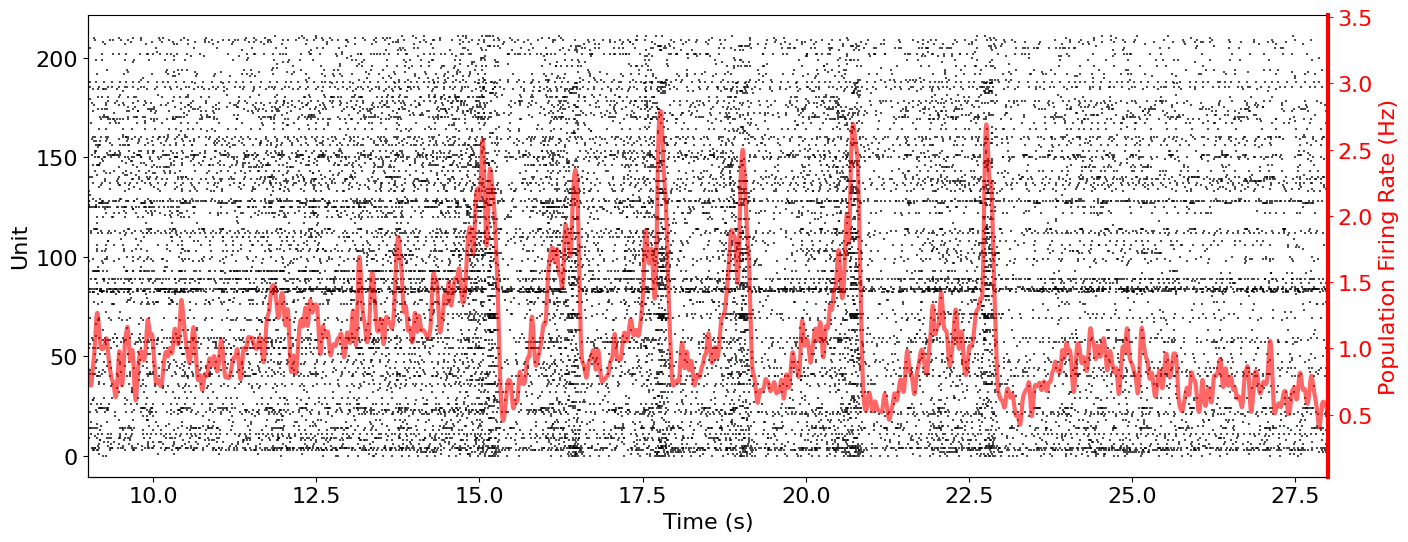

In [4]:
plot_raster(sd, xlim=(9,28))

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

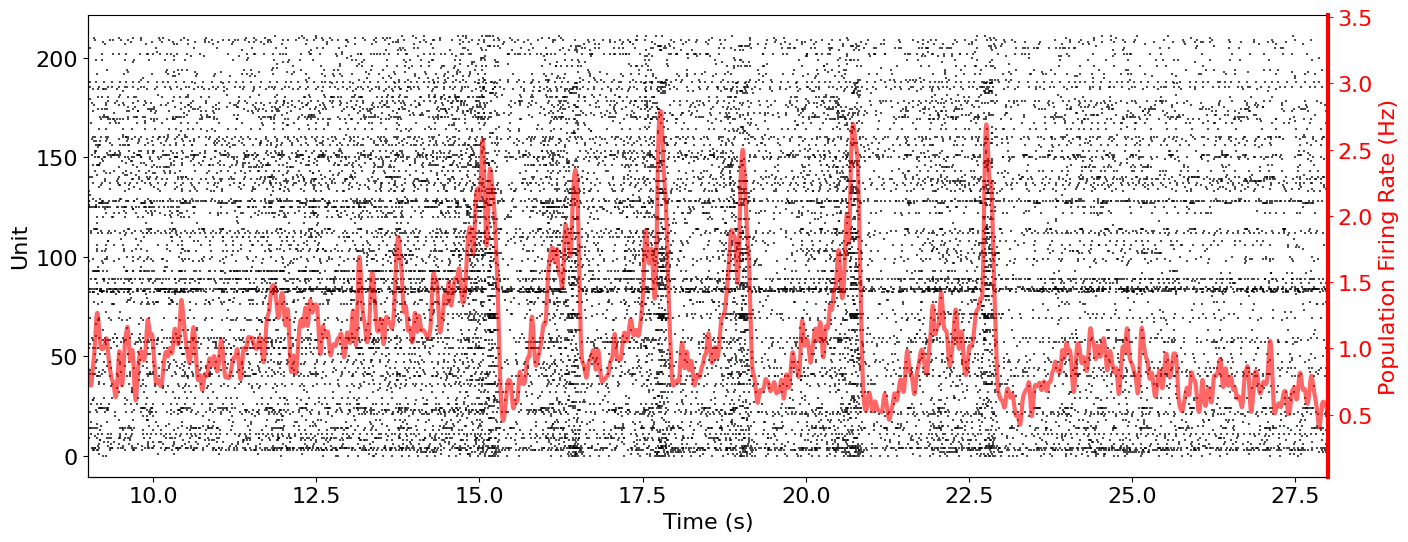

In [5]:
plot_raster(sd, xlim=(9,28))

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

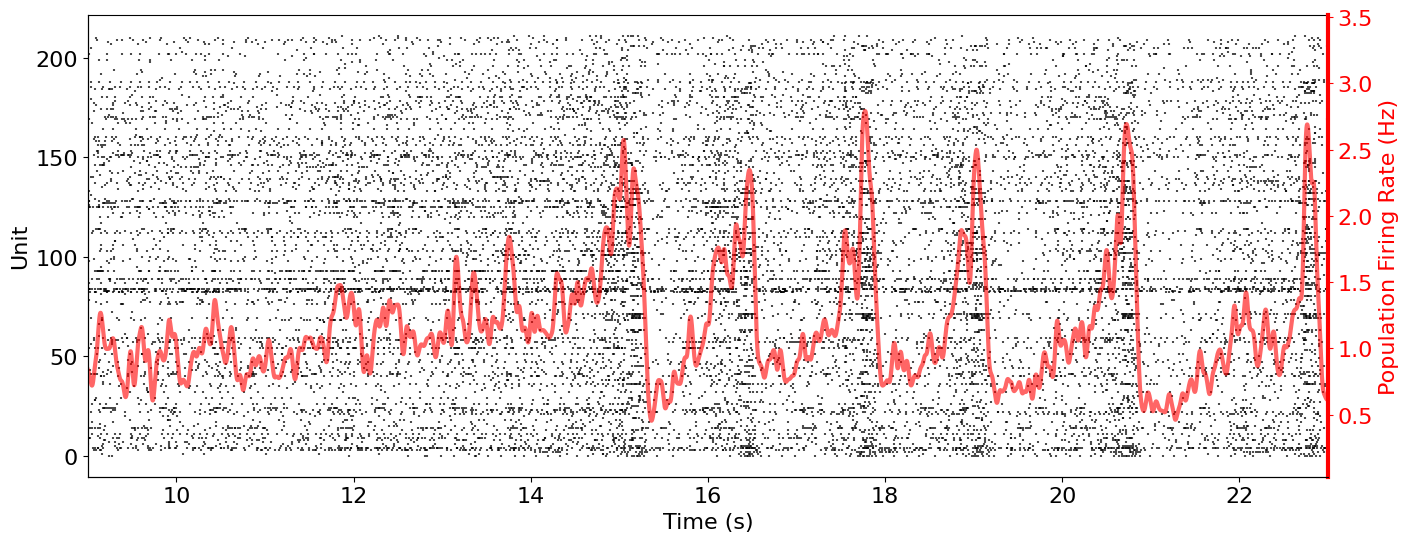

In [6]:
plot_raster(sd, xlim=(9,23))

# make spectrogram

In [7]:
data = get_brain_waves( data_raw["data"], data_raw["frame_rate"] )#[wave_type]  # get common brain waves


In [13]:
checkit = data["basic"][0:200,0:2000]

In [14]:
checkit.shape

(200, 2000)

In [15]:
power, times, frequencies, coif = cwt_spectrogram( checkit,  data_raw["frame_rate"], nNotes=12)



ValueError: For X (201) and Y (73) with flat shading, A should have shape (72, 200, 3) or (72, 200, 4) or (72, 200) or (14400,), not (72, 200, 2000)

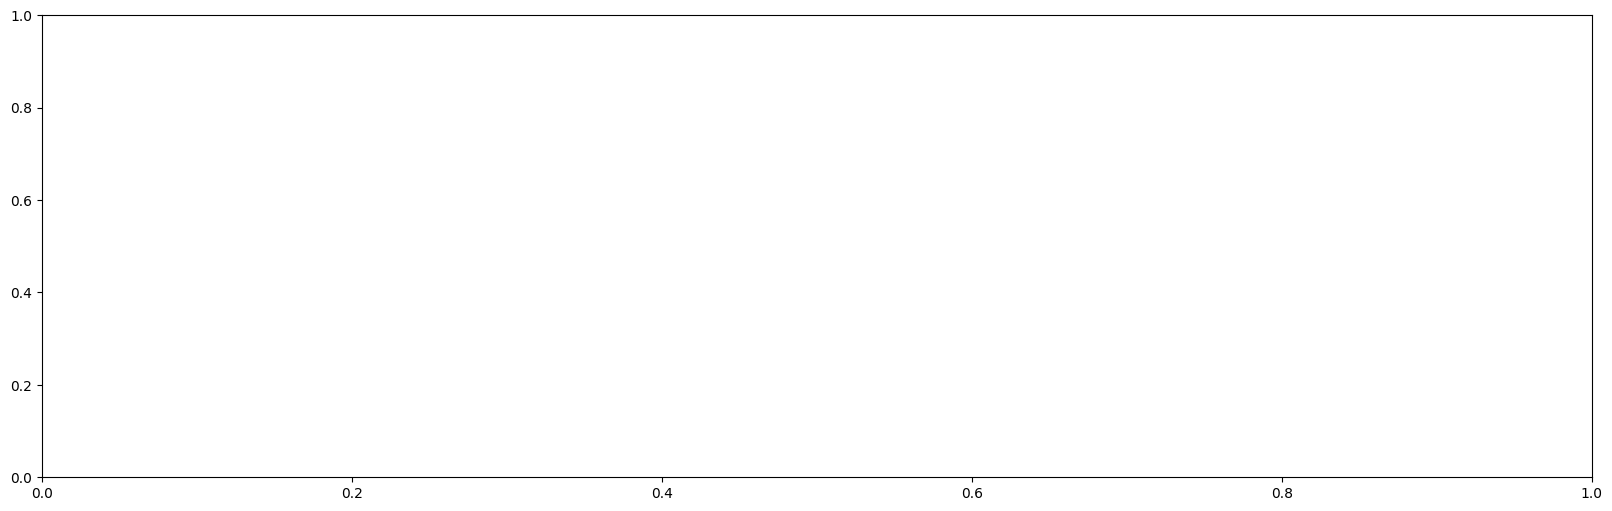

In [16]:
#print(i, channel,raw_trace.shape)
fig, axs = plt.subplots(1, 1, figsize=(20, 6))
spectrogram_plot(power, times, frequencies, coif, ax=axs)

axs.set_title(f"spectrum", fontsize=12)
#axs.set_xlim(0, len(data1_lfp)/fs ) # code causes errors
#axs.set_ylim(0, 100)
axs.set_xlabel('time (s)')
axs.set_ylabel('frequency (Hz)')
axs.set_yscale('log')
plt.show(block=False)

In [ ]:


def spectrogram_plot(z, times, frequencies, coif, cmap="jet", norm=LogNorm(vmin=10e-8, vmax=10e4), ax=None, colorbar=True):
    ###########################################################################
    # plot
    
    # set default colormap, if none specified
    if cmap is None:
        cmap = get_cmap('Greys')
    # or if cmap is a string, get the actual object
    elif isinstance(cmap, str):
        cmap = get_cmap(cmap)

    # create the figure if needed
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = plt.gcf()

    xx,yy = np.meshgrid(times,frequencies)
    ZZ = z
    
    im = ax.pcolor(xx,yy,ZZ, norm=norm, cmap=cmap)
    # ax.plot(times,coif)
    # ax.fill_between(times,coif, step="mid", alpha=0.4)
    
    if colorbar:
        cbaxes = inset_axes(ax, width="2%", height="90%", loc=4) 
        fig.colorbar(im, cax=cbaxes, orientation='vertical')

    ax.set_xlim(times.min(), times.max())
    ax.set_ylim(frequencies.min(), frequencies.max())

    return ax

In [ ]:

spectrogram_data = {"power":power, "times":times, "frequencies":frequencies, "coif":coif }
with open( 'spectrogram_data.pkl' , 'wb') as my_file:
   pickle.dump(spectrogram_data, my_file)
#load pickled data
# with open( 'curate_latencies_good_pairs.pkl' , 'rb') as my_file:
#     good_pairs = pickle.load(my_file)
# print(len(good_pairs))